# Integrate and fire model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from numba import jit

In [2]:
output_notebook()

Loading BokehJS ...

In [81]:
# Define a dictionary to store all parameters
param_dict = {'C': 0.2, 
              'gL': 10/1000,
              'EL': -60,
              'sigma': 0.12,
              'Vreset': -61,
              'Vthresh': -55,
              'tau_ref': 2,
              'EI': -75,
              'EE': -5,
              'V': -56,
              'dt': 0.1,
              'gE': 2.0/1000,
              'gI': 1/1000,
              'nsteps': 1000,
              'smax': 7,
             'tau_I': 80,
             'wI': 0.0011575}

In [10]:
def update_V(spikes, s, V, params):
    '''Update V according to the integrate and fire model'''
    smax = params['smax']
    Vreset = params['Vreset']
    Vthresh = params['Vthresh']
    tau_ref = params['tau_ref']
    C = params['C']
    gL = params['gL']
    EL = params['EL']
    gE = params['gE']
    EE = params['EE']
    gI = params['gI']
    sigma = params['sigma']
    tau_I = params['tau_I']
    dt = params['dt']
    EI = params['EI']
    
    t = len(spikes)
    if np.sum(np.nonzero(spikes)) == 0:
        lastfire = -np.inf
    else:
        lastfire = np.max(np.nonzero(spikes))

    if (t - lastfire) * dt < tau_ref:
        return 0, Vreset, s - s / tau_I * dt
    elif V >= Vthresh:
        return 1, Vreset, s + (smax - s) / smax
    else:
        noise = np.random.normal()
        Vdot = (gL * (EL - V) + gE * (EE - V) + gI * (EI - V) + sigma * noise) / C
        return 0, V + dt * Vdot, s - s / tau_I * dt
        
    

## Simulate a spike train with no inhibitory input

In [11]:
nsteps = 10000
spikes = []
Vlst = []
slst = []

V = param_dict['EL']
s = 0

for i in range(nsteps):
    state, V, s = update_V(spikes, s, V, param_dict)
    spikes.append(state)
    Vlst.append(V)
    slst.append(s)

In [12]:
np.mean(slst)

2.7895797382129373

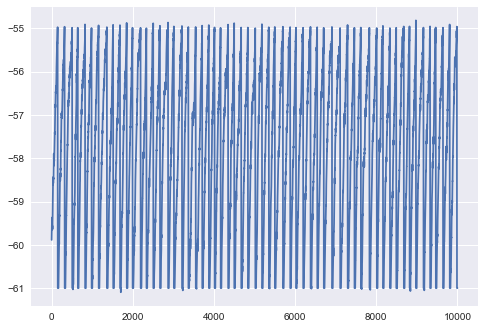

In [13]:
plt.plot(Vlst)

In [14]:
np.sum(spikes)

59

In [ ]:
p = figure(width=500, height=500)

In [ ]:
p.line(np.arange(len(slst)), slst)
show(p)

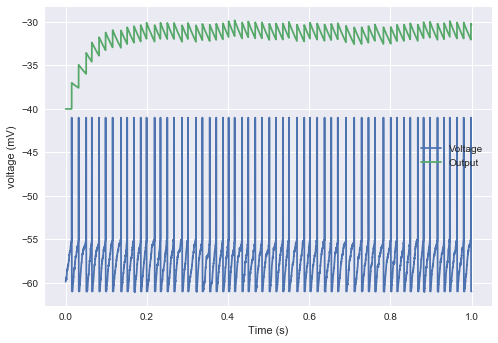

In [16]:
plt.plot(np.arange(nsteps) * 0.1 / 1000, np.array(Vlst) + np.array(spikes) * 20,
        label='Voltage');
plt.plot(np.arange(nsteps) * 0.1 / 1000, np.array(slst) * 3 - 40,
        label='Output')
#plt.ylim(-65, -40)
plt.xlabel('Time (s)')
plt.ylabel('voltage (mV)');
plt.legend();


## Plot the IO function

In [98]:
gI_list = np.arange(8) / 1000

In [99]:
param_for_S2

{'C': 0.2,
 'EE': -5,
 'EI': -75,
 'EL': -60,
 'V': -56,
 'Vreset': -61,
 'Vthresh': -55,
 'dt': 0.1,
 'gE': 0.002,
 'gI': 0.0050000000000000001,
 'gL': 0.01,
 'nsteps': 1000,
 'sigma': 0.12,
 'smax': 7,
 'tau_I': 80,
 'tau_ref': 2,
 'wI': 0.0011575}

In [101]:
rate_lst = []
output_lst = []
nsteps = 10000
param_for_S2 = param_dict.copy()
param_for_S2['gE'] = 2/1000
#Vlst = []

for gI in gI_list:
    print('Doing gI=', gI)
    param_for_S2['gI'] = gI
    spikes = []
    s = 0
    V = param_for_S2['EL']
    slst = []
    for i in range(nsteps):
        state, V, s = update_V(spikes, s, V, param_for_S2)
        #Vlst.append(V)
        spikes.append(state)
        slst.append(s)
    output_lst.append(np.mean(slst))
    rate_lst.append(np.sum(spikes))
    
    

Doing gI= 0.0
Doing gI= 0.001
Doing gI= 0.002
Doing gI= 0.003
Doing gI= 0.004
Doing gI= 0.005
Doing gI= 0.006
Doing gI= 0.007


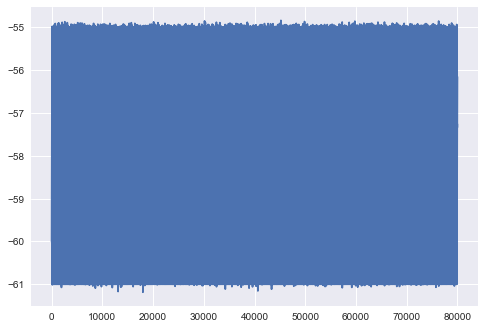

In [102]:
plt.plot(Vlst)

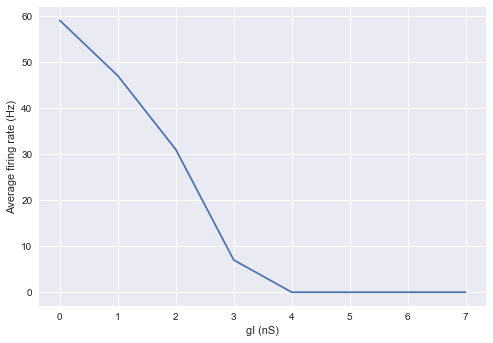

In [103]:
plt.plot(gI_list * 1000, rate_lst)
plt.xlabel('gI (nS)')
plt.ylabel('Average firing rate (Hz)')

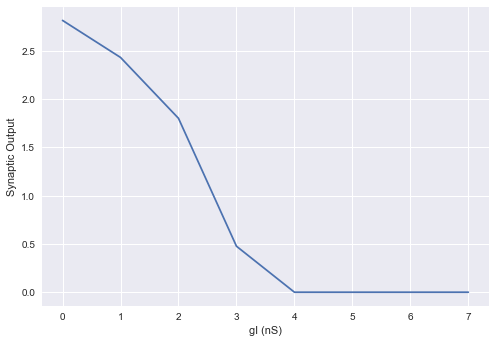

In [104]:
plt.plot(gI_list * 1000, output_lst)
plt.xlabel('gI (nS)')
plt.ylabel('Synaptic Output')

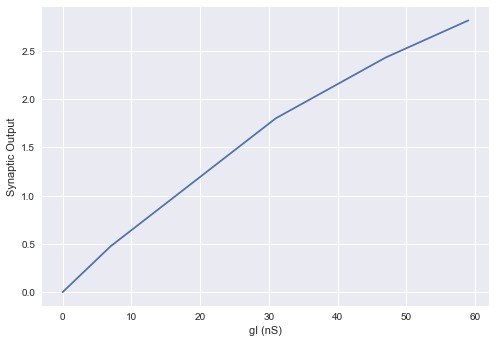

In [105]:
plt.plot(rate_lst, output_lst)
plt.xlabel('gI (nS)')
plt.ylabel('Synaptic Output')